In [3]:
# DA 320 
# Assignment: Practical Dashboard
# Student: Jennifer Roria
# Date: Nov, 5 2023

# References: 
#Source of code by Prof. Ted Spence: https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb
#Plot design by Selva Prabhakaran: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#20.-Histogram-for-Continuous-Variable
#Histogram plot from Discussion Board 

In [4]:
#importing libraries
import urllib3
import certifi
import json
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Retrieve Connection from a JSON File

In [5]:
#Loading credentials for connection server

with open ('/Users/jennsmacbook/Downloads/secrets.json') as f:
    data = json.load(f)
secret_key = data['mongoDB']

Connect to a MongoDB Server to DA-320 Database 

In [6]:
# Connect to the database 
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

#Fetch the database named "DA320"
da320_database = client['DA320']

#Access to collections
allCollections = da320_database.list_collection_names()

# output the collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['METACRITIC ', 'IMBD', 'IMBD_Pipeline']


Fetching The Practical Dashboards Collection/Pipeline from a MongoDB Server

In [7]:
#creating a cursor
cursor = da320_database["IMBD_Pipeline"].find()

# converting into a Panda dataframe
pr_dash = pd.DataFrame(cursor)

# check information
pr_dash.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
0,652b81f6e5f87fac42d4650e,77631,Grease,110.0,7.2,265183,6000000.0,None,394955690.0,"[Comedy, Musical, Romance]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organiza...",1978-06-13,"[TV-14, (D)]","[6, 13, 1978]",TV-14,1978
1,652b81f6e5f87fac42d46518,11354364,Reveal,130.0,4.6,1508,NaN,None,NaN,"[Mystery, Thriller]","[Aadhya Aaradhana, Advith Narayanankutty, Sudh...",[Murali .S.V.],[Jayasudha K.],[Sri Manjunatha Cine Combines],2019-11-29,None,"[11, 29, 2019]",None,2019
2,652b81f6e5f87fac42d46512,77975,National Lampoon's Animal House,109.0,7.4,119917,3000000.0,None,3371006.0,[Comedy],"[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, St...",1978-07-27,"[TV-14, (DLSV, TV Rating.)]","[7, 27, 1978]",TV-14,1978
3,652b81f6e5f87fac42d4650f,78346,Superman,143.0,7.4,172769,55000000.0,None,166200000.0,"[Action, Adventure, Sci-Fi]","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internati...",1978-12-10,"[TV-PG, (LV)]","[12, 10, 1978]",TV-PG,1978
4,652b81f6e5f87fac42d46515,77713,I Spit on Your Grave,101.0,5.6,28381,650000.0,None,NaN,"[Horror, Thriller]","[Camille Keaton, Eron Tabor, Richard Pace, Ant...",[Meir Zarchi],"[Meir Zarchi, Joseph Zbeda]",[Barquel Creations],1978-05-23,[TV-MA],"[5, 23, 1978]",TV-MA,1978


#Chart 1: Evaluating Single Genre Movie (Action) Over Time

In [8]:
#Creating a cursor for the dataframe

cursor = da320_database["IMBD_Pipeline"].find({"genres":{"$in": ["Action"] }})
action_films = pd.DataFrame(cursor)

#Creating a currency format
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

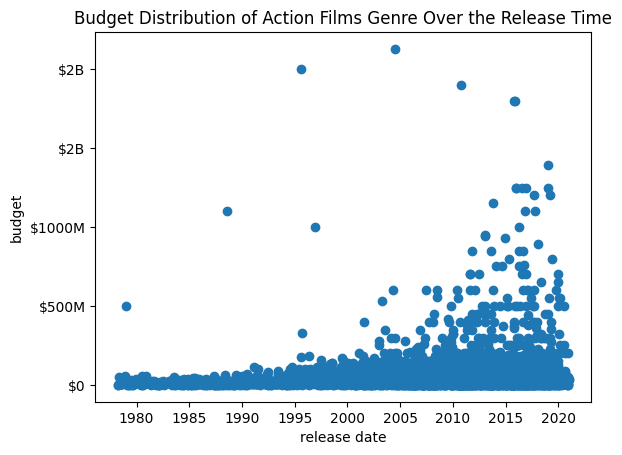

In [9]:
#Generating a scatter plot of budget distribution for the drama films genre over the release time
plt.title('Budget Distribution of Action Films Genre Over the Release Time')
plt.scatter(action_films['release_date'], action_films['budget'])
plt.xlabel('release date')
plt.ylabel('budget')
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

Findings: This scatterplot shows that there is a positive correlation between budget and release date, which means that action movies with higher budgets are more likely to be released after 1995. This is likely due to a number of factors, such as:
1. The increasing popularity of action films in the 1990s and 2000s, which led to studios being willing to invest more money in these films.
2. The increasing cost of producing action films, due to the need for more expensive special effects and stunts.
3. The increasing competition for audiences, which led studios to produce more big-budget action films in order to attract attention.


#Chart 2: Evaluating Movies Released in 1999

In [10]:
#Creating cursor for the year 1999
cursor = da320_database["IMBD_Pipeline"].find({"release_year":{"$in": ["1999"] }})
year_films = pd.DataFrame(cursor)

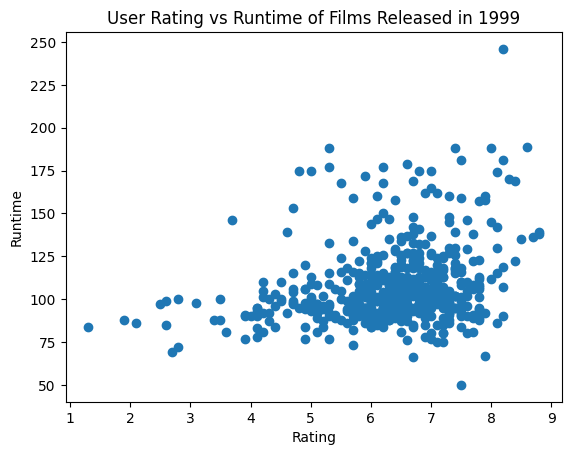

In [11]:
#Generating a scatter plot of User Rating vs Runtime of all films realeased in 1999
plt.title('User Rating vs Runtime of Films Released in 1999')
plt.scatter(year_films['user_rating'], year_films['runtime'])

plt.xlabel('Rating')
plt.ylabel('Runtime')
plt.show()

Findings: 
The scatter plot shows a positive correlation between the user rating and runtime of films released in 1999. This means that as the runtime of a film increases, its user rating also tends to increase. Based on the scatterplot we can spot an outlier which has a runtime of almost 250 minutes, but it has a user rating of 8.2. This is significantly higher than the other films with similar runtimes.

/var/folders/0s/x56fckyn20b664mmg2bfd_gc0000gn/T/ipykernel_1227/2278981063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='user_rating', y='runtime',  data=year_films, scale='width', inner='quartile', palette="RdYlBu")
/var/folders/0s/x56fckyn20b664mmg2bfd_gc0000gn/T/ipykernel_1227/2278981063.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='user_rating', y='runtime',  data=year_films, scale='width', inner='quartile', palette="RdYlBu")


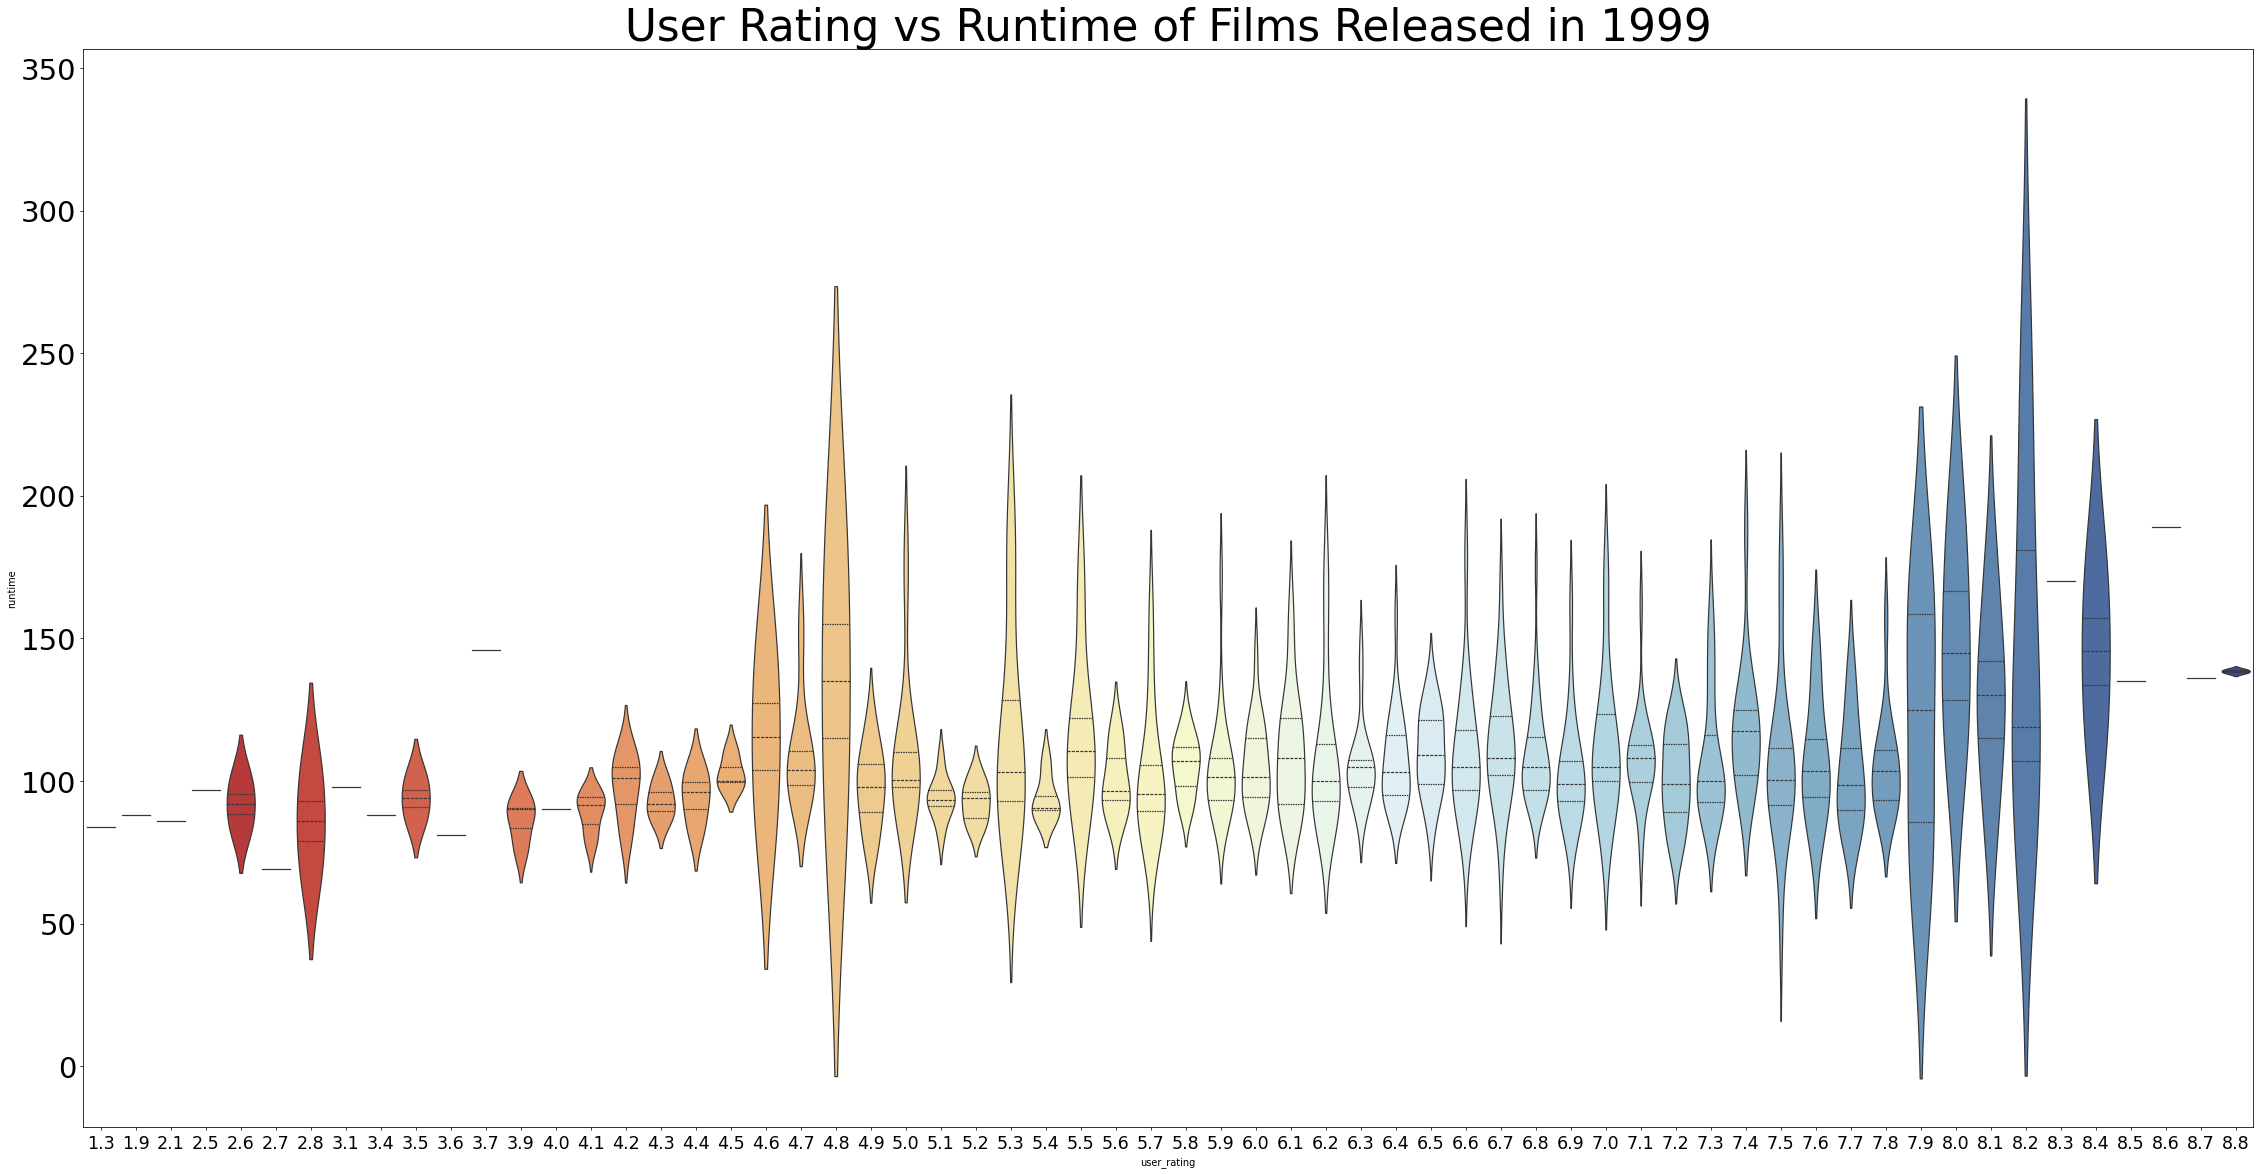

In [12]:
#Generating a Violinplot of User Rating vs Runtime of Films Released in 1999
plt.figure(figsize=(40,20), dpi=70)
sns.violinplot(x='user_rating', y='runtime',  data=year_films, scale='width', inner='quartile', palette="RdYlBu")

#Plot Configurations
plt.title('User Rating vs Runtime of Films Released in 1999', fontsize=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=30)


plt.show()

The violin plot shows the distribution of user ratings for films released in 1999, grouped by runtime. The x-axis displays user rating, while y-axis displays the runtime of each movie. The graph displays a positive relationship between the runtime and user rating of 1999 film releases. This indicates that consumers tend give longer films a higher overall rating. The data does, however, the graph also show significant variety, with some lengthier films obtaining low scores and some shorter films receiving high ones.

On violinplot near the 8.2 user rating, we can spot a significant duration of runtime, and from both scatterplot and violinplot we can assume is outlier.

In [13]:
#Checking and Verifying Outlier
year_films.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
222,652b81f8e5f87fac42d480b3,173772,My Voyage to Italy,246.0,8.2,3288,NaN,None,NaN,[Documentary],[Martin Scorsese],[Martin Scorsese],"[Giorgio Armani, Marianne Bower, Marco Chimenz...","[MediaTrade, Cappa Production, Paso Doble Fi...",1999-09-11,[PG-13],"[9, 11, 1999]",PG-13,1999
198,652b81f8e5f87fac42d47fa7,120689,The Green Mile,189.0,8.6,1264131,60000000.0,None,286801374.0,"[Crime, Drama, Fantasy, Mystery]","[Tom Hanks, David Morse, Bonnie Hunt, Michael ...",[Frank Darabont],"[Frank Darabont, David Valdes]","[Castle Rock Entertainment, Darkwoods Product...",1999-12-06,"[TV-14, (LV, TV Rating.)]","[12, 6, 1999]",TV-14,1999
217,652b81f8e5f87fac42d48084,150992,Hum Dil De Chuke Sanam,188.0,7.4,18584,60000000.0,None,NaN,"[Comedy, Drama, Musical, Romance]","[Aishwarya Rai Bachchan, Salman Khan, Ajay Dev...",[Sanjay Leela Bhansali],"[Sanjay Leela Bhansali, Ibrahim Desai, Jhamu S...",[Bhansali Films],1999-06-18,[Not Rated],"[6, 18, 1999]",Not Rated,1999
2,652b81f8e5f87fac42d47fa8,175880,Magnolia,188.0,8.0,309027,37000000.0,None,25995827.0,[Drama],"[Pat Healy, Genevieve Zweig, Mark Flanagan, Ne...",[Paul Thomas Anderson],"[Paul Thomas Anderson, Michael De Luca, Lynn H...","[Ghoulardi Film Company, New Line Cinema, Th...",1999-12-08,"[TV-14, (DLSV, TV rating)]","[12, 8, 1999]",TV-14,1999
236,652b81f8e5f87fac42d48137,225515,Dillagi,188.0,5.3,1164,NaN,None,NaN,"[Drama, Musical, Romance]","[Sunny Deol, Bobby Deol, Urmila Matondkar, Dar...",[Sunny Deol],[Sunny Deol],[Vijayta Films],1999-11-19,[Not Rated],"[11, 19, 1999]",Not Rated,1999


I've found the outlier, which is an Italian documentary called "My Voyage to Italy", which has a duration of 4 hours and 6 minutes.

This findings implies that there is not a perfect correlation between runtime and user rating. User ratings can also be influenced by other elements, such the director, the cast, and the genre of the movie.

My Voyage to Italy's high rating can be attributable to the film's artistic merits or unusual subject matter. It's also feasible that a tiny percentage of really enthusiastic users gave the movie high ratings.

Chart #3: Evaluating Movies Scores for "Duo Roberts" - Robert Pattinson vs. Robert Downey Jr.

In [14]:
#Creating Cursor for Actor Robert Pattinson
cursor = da320_database["IMBD_Pipeline"].find({"casts":{"$in": ["Robert Pattinson"] }})
actor_pattinson = pd.DataFrame(cursor)

actor_pattinson.head()


,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
0,652b81fae5f87fac42d49a99,1057581,How to Be,85,5.3,3891,500000.0,None,NaN,"[Comedy, Drama]","[Robert Pattinson, Rebecca Pidgeon, Powell Jon...",[Oliver Irving],"[Scott Bassett, Justin Kelly, Michael Williams]",[How To Be Films],2008-01-18,[Not Rated],"[1, 18, 2008]",Not Rated,2008
1,652b81fae5f87fac42d499bb,1104083,Little Ashes,112,6.4,9192,2500000.0,None,NaN,"[Biography, Drama, Romance]","[Javier Beltrán, Robert Pattinson, Matthew McN...",[Paul Morrison],"[Robert Bevan, Fernando Bofill, Vaishnavi Bras...","[APT Films, Aria Films, Factotum Barcelona S...",2008-10-07,[R],"[10, 7, 2008]",R,2008
2,652b81fae5f87fac42d49c9b,1259571,The Twilight Saga: New Moon,130,4.7,281698,50000000.0,None,709827462.0,"[Adventure, Drama, Fantasy, Romance]","[Kristen Stewart, Christina Jastrzembska, Robe...",[Chris Weitz],"[Bill Bannerman, Marty Bowen, Guido Cerasuolo,...","[Temple Hill Entertainment, Maverick Films, ...",2009-11-16,[PG-13],"[11, 16, 2009]",PG-13,2009
3,652b81fae5f87fac42d4a0c8,1325004,The Twilight Saga: Eclipse,124,5.0,243492,68000000.0,None,698491347.0,"[Action, Adventure, Drama, Fantasy, Romance, T...","[Xavier Samuel, Kristen Stewart, Robert Pattin...",[David Slade],"[Bill Bannerman, Marty Bowen, Wyck Godfrey, Is...","[Summit Entertainment, Temple Hill Entertainm...",2010-06-30,[PG-13],"[6, 30, 2010]",PG-13,2010
4,652b81fae5f87fac42d4a0bd,1403981,Remember Me,113,7.1,146208,16000000.0,None,56506120.0,"[Drama, Romance]","[Caitlyn Rund, Moisés Acevedo, Noel Rodriguez,...",[Allen Coulter],"[Carol Cuddy, Trevor Engelson, Michael Lannan,...",[Summit Entertainment],2010-03-01,[PG-13],"[3, 1, 2010]",PG-13,2010


In [15]:
#Creating Cursor for Actor Robert Downey Jr. 
cursor = da320_database["IMBD_Pipeline"].find({"casts":{"$in": ["Robert Downey Jr."] }})
actor_downey_jr = pd.DataFrame(cursor)

actor_downey_jr.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
0,652b81f6e5f87fac42d46cdc,90685,Back to School,96,6.6,32378,11000000.0,None,NaN,"[Comedy, Romance, Sport]","[Rodney Dangerfield, Sally Kellerman, Burt You...",[Alan Metter],"[Estelle Endler, Michael Endler, Harold Ramis,...","[Orion Pictures, Paper Clip Productions]",1986-06-13,"[TV-14, (DLS)]","[6, 13, 1986]",TV-14,1986
1,652b81f6e5f87fac42d46ba1,90305,Weird Science,94,6.6,87841,7500000.0,None,38934048.0,"[Comedy, Romance, Sci-Fi]","[Anthony Michael Hall, Kelly LeBrock, Ilan Mit...",[John Hughes],"[Joel Silver, Jane Vickerilla]",[Universal Pictures],1985-08-02,"[TV-14, (TV Rating)]","[8, 2, 1985]",TV-14,1985
2,652b81f6e5f87fac42d46bf3,90213,Tuff Turf,112,6.0,4988,NaN,None,NaN,"[Action, Comedy, Drama]","[James Spader, Kim Richards, Paul Mones, Matt ...",[Fritz Kiersch],"[Donald P. Borchers, Pat Kehoe, Bob Manning]","[New World Pictures, Planet Productions]",1985-01-11,[R],"[1, 11, 1985]",R,1985
3,652b81f6e5f87fac42d46b32,87263,Firstborn,103,6.2,2472,8000000.0,None,NaN,"[Drama, Thriller]","[Teri Garr, Peter Weller, Christopher Collet, ...",[Michael Apted],"[Stanley R. Jaffe, Paul Junger Witt, Ron Koslo...","[Paramount Pictures, Jaffe-Lansing, Witt/Tho...",1984-10-26,[PG-13],"[10, 26, 1984]",PG-13,1984
4,652b81f7e5f87fac42d46e5d,93737,The Pick-up Artist,81,5.3,7083,15000000.0,None,NaN,"[Comedy, Crime, Drama, Romance]","[Molly Ringwald, Robert Downey Jr., Dennis Hop...",[James Toback],"[Warren Beatty, David Leigh MacLeod]","[Amercent Films, American Entertainment Partn...",1987-09-18,[PG-13],"[9, 18, 1987]",PG-13,1987


/var/folders/0s/x56fckyn20b664mmg2bfd_gc0000gn/T/ipykernel_1227/4228415693.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actor_pattinson['user_rating'],  kde=False, label='Robert Pattinson')
/var/folders/0s/x56fckyn20b664mmg2bfd_gc0000gn/T/ipykernel_1227/4228415693.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

Text(0, 0.5, 'Density')

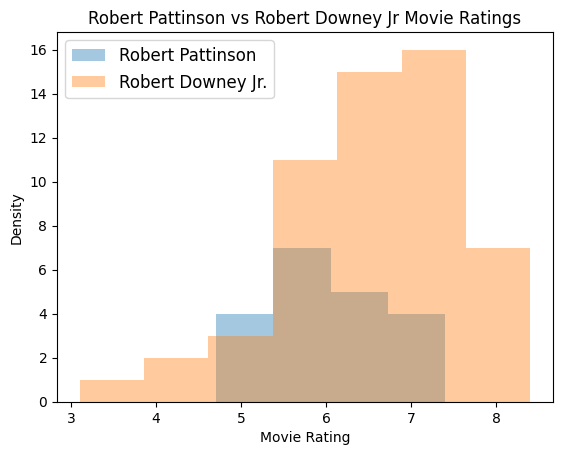

In [16]:
# Add a new column for the actor in each DataFrame
actor_pattinson['actor'] = 'Robert Pattinson'
actor_downey_jr['actor'] = 'Robert Downey Jr.'

sns.distplot(actor_pattinson['user_rating'],  kde=False, label='Robert Pattinson')

sns.distplot(actor_downey_jr['user_rating'],  kde=False, label='Robert Downey Jr.')

plt.legend(prop={'size': 12})
plt.title('Robert Pattinson vs Robert Downey Jr Movie Ratings')
plt.xlabel('Movie Rating')
plt.ylabel('Density')

The chart shows that, on average, Robert Downey Jr.'s movies have higher ratings than Robert Pattinson's movies. The middle rating (median) for Downey Jr.'s movies is 7, while for Pattinson's movies, it's 6. Moreover, more of Downey Jr.'s movies have ratings of 8 or higher.

There are a few reasons for these rating differences. It could be that Downey Jr. has been in more critically praised movies. Alternatively, he might be a more popular actor, leading to more people watching and rating his films. Another possibility is that Downey Jr.'s movies have broader appeal, while Pattinson's movies cater to a more specific audience

#Aggregation Pipeline

#For 1st Stage: $project

{
     id:"$id",
     title:"$title",
     runtime:{
       $convert:{
       input: "$runtime",
       to: "int",
       onError: null,
     }
   },
     user_rating:{
       $convert:{
       input: "$user_rating",
       to: "double",
       onError: null,
     }
   },   
     votes:{
       $convert:{
       input: "$votes",
       to: "int",
       onError: null,
    }
   },
     budget:{
       $convert:{
       input: "$budget",
       to: "int",
       onError: null,
     }
   },
     opening_weekend:{
       $convert:{
       input: "$opening_wekend",
       to: "int",
       onError: null,
    }
  },
     gross_sales:{
       $convert:{
       input: "$gross_sales",
       to: "int",
       onError: null,
    }
  },
 /*
  * Breaking apart the Genres, Cast, Director, 
  * Producer, and Company fields into arrays of names
  */
     genres:{
     $map:{
      input:{$split:["$genres", ","]},
      as :"mapped_data",
      in: {$trim:{input:"$$mapped_data"}}
     }
   },
     casts:{
     $map:{
      input:{$split:["$cast", ","]},
      as :"mapped_data",
      in: {$trim:{input:"$$mapped_data"}}
     }
   },
     directors:{
     $map:{
      input:{$split:["$director", ","]},
      as :"mapped_data",
      in: {$trim:{input:"$$mapped_data"}}
     }
   },
    
     producers:{
     $map:{
      input:{$split:["$producer", ","]},
      as :"mapped_data",
      in: {$trim:{input:"$$mapped_data"}}
     }
   },
     companies: {
       $split: [
         {
           $toString: "$company",
         },
         ",",
       ],
     },

   /**
  Convert the Release Date field into a date
  */
 
     release_date:{
       $convert:{
       input: "$release_date",
       to: "date",
       onError: null,
     }
   },
/*
  * Break apart the MPAA rating field into two fields: the rating, and ignore the DSLV descriptors
  */

    mpaa_rating:{
     $map:{
      input:{$split:["$mpaa_rating", "::"]},
      as :"mapped_data",
      in: {$trim:{input:"$$mapped_data"}}
    
     }
   }

#For 2nd stage: $addFields

 {
   rating: {$arrayElemAt:["$mpaa_rating",0]}
 }


#For 3rd stage: $addFields

 {
  release_year: {$arrayElemAt:["$release_date_for_year_fetch",2]}
}